In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [139]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [140]:
df.shape

(13320, 9)

In [141]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [142]:
df.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [143]:
df1=df.drop(['availability','society'],axis=1)
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [144]:
df1.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [145]:
df1['balcony']=df1['balcony'].fillna(df1['balcony'].median())

In [146]:
df1.isnull().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [147]:
df2=df1.dropna()

In [148]:
df2.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [149]:
df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-149-d97910c39351>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [150]:
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [151]:
df2.drop('size',inplace=True,axis=1)

C:\Users\SAGAR\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [152]:
df2.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2


In [153]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [154]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [155]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,area_type,location,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
648,Built-up Area,Arekere,4125Perch,9.0,2.0,265.000,9
661,Super built-up Area,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4


In [156]:
def convert_sqft_to_num(x):
    n=x.split('-')
    if len(n)==2:
        return (float(n[0])+float(n[1]))/2
    try:
        return float(x)
    except:
        return None

In [157]:
df3=df2.copy()

In [158]:
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft_to_num)

In [159]:
df3.loc[410]

area_type     Super built-up  Area
location                   Kengeri
total_sqft                     NaN
bath                           1.0
balcony                        0.0
price                         18.5
bhk                              1
Name: 410, dtype: object

In [160]:
df3.isnull().sum()

area_type      0
location       0
total_sqft    46
bath           0
balcony        0
price          0
bhk            0
dtype: int64

In [161]:
len(df3['location'].unique())

1304

In [162]:
df3.location=df3.location.apply(lambda x: x.strip())

location_stats=df3.groupby('location')['location'].agg('count')
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [163]:
len(location_stats[location_stats<=10])

1052

In [164]:
loc_stats_less_than_10=location_stats[location_stats<=10]
loc_stats_less_than_10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1052, dtype: int64

In [165]:
df3.location=df3.location.apply(lambda x: 'other' if x in loc_stats_less_than_10 else x)

In [166]:
df3.shape

(13246, 7)

In [167]:
df4=df3.copy()
df4['price_per_sqft']=df4['price']*100000/df4['total_sqft']

In [168]:
df4.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [169]:
df5=df4.copy()


In [170]:
def remove_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


In [171]:
df6=remove_outliers(df5)
df6.shape

(11428, 8)

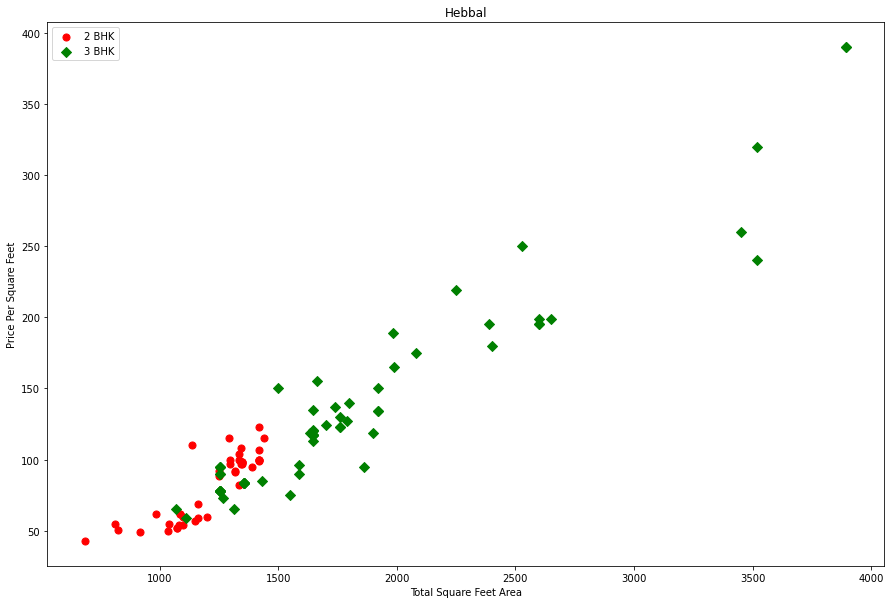

In [172]:
import matplotlib.pyplot as plt
import matplotlib
def plot_scatter(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='red',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='D',color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

    
plot_scatter(df6,"Hebbal")

In [173]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean': np.mean(bhk_df.price_per_sqft),
                 'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df7=remove_bhk_outliers(df6)
df7.shape

(8002, 8)

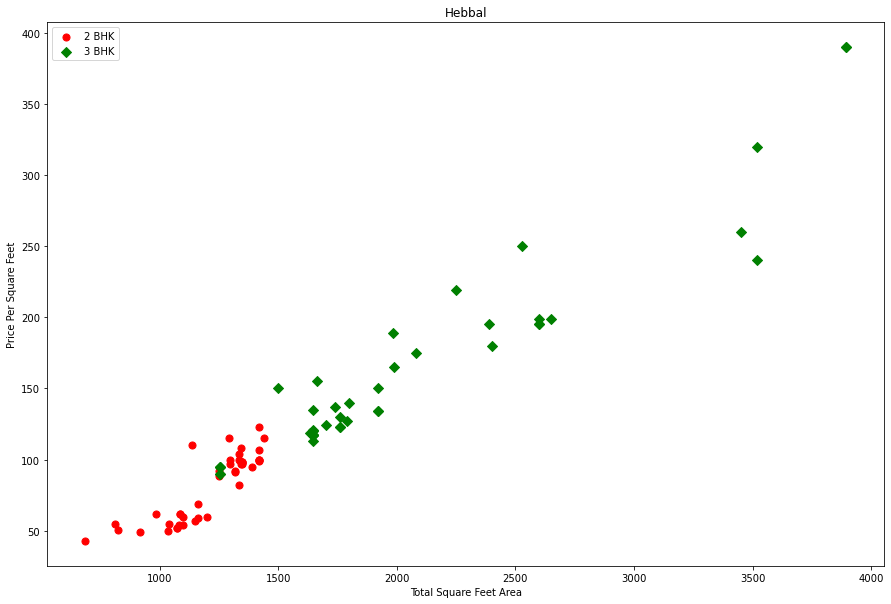

In [174]:
import matplotlib.pyplot as plt
import matplotlib
def plot_scatter(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='red',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='D',color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

    
plot_scatter(df7,"Hebbal")

In [175]:
df7.bath.unique()

array([ 4.,  3.,  6.,  2.,  5.,  1.,  8.,  7.,  9., 10., 12., 14., 27.,
       16., 15., 13., 18.])

Text(0, 0.5, 'Count')

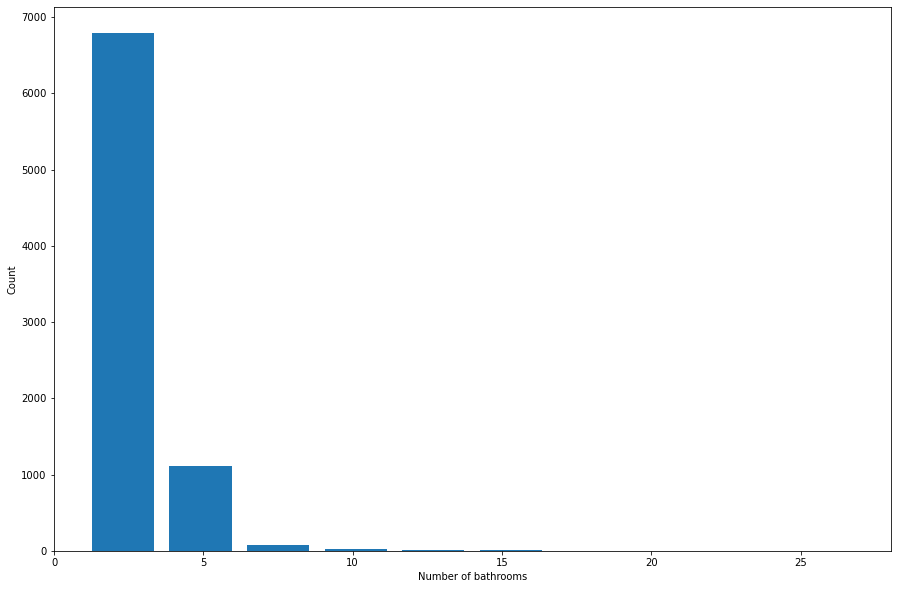

In [176]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [177]:
df7[df7.bath>df7.bhk+2]

,area_type,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1635,Plot Area,Chamrajpet,1500.0,9.0,3.0,230.0,6,15333.333333
1771,Built-up Area,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
5604,Built-up Area,Nagasandra,7000.0,8.0,2.0,450.0,4,6428.571429
7229,Super built-up Area,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
8812,Plot Area,other,3300.0,14.0,2.0,500.0,9,15151.515152
9007,Plot Area,other,990.0,12.0,0.0,120.0,8,12121.212121
10308,Plot Area,other,1850.0,12.0,2.0,300.0,8,16216.216216
10693,Plot Area,other,2400.0,6.0,2.0,775.0,3,32291.666667
11365,Plot Area,other,7150.0,13.0,2.0,3600.0,10,50349.650350


In [178]:
df8=df7[df7.bath<df7.bhk+2]
df8.shape

(7901, 8)

In [179]:
df8.drop(['price_per_sqft'],axis=1,inplace=True)

C:\Users\SAGAR\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [180]:
df8.head()

,area_type,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1200.0,6.0,2.0,125.0,6
3,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
4,Plot Area,1st Block Jayanagar,930.0,4.0,2.0,85.0,7


In [181]:
df8.balcony.unique()

array([1., 2., 3., 0.])

In [182]:
df8[df8['balcony']==3]

,area_type,location,total_sqft,bath,balcony,price,bhk
3,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
20,Super built-up Area,1st Phase JP Nagar,1590.0,3.0,3.0,131.0,3
25,Super built-up Area,1st Phase JP Nagar,2077.0,3.0,3.0,175.0,3
35,Super built-up Area,2nd Phase Judicial Layout,1681.0,3.0,3.0,69.0,3
43,Plot Area,2nd Stage Nagarbhavi,1200.0,4.0,3.0,240.0,5
...,...,...,...,...,...,...,...
11332,Super built-up Area,other,1200.0,3.0,3.0,75.0,3
11339,Plot Area,other,625.0,3.0,3.0,78.0,6
11350,Plot Area,other,600.0,3.0,3.0,86.0,3
11376,Built-up Area,other,2920.0,4.0,3.0,536.0,4


In [183]:
loc_dummies=pd.get_dummies(df8.location)
loc_dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [184]:
df9=pd.concat([df8,loc_dummies.drop('other',axis='columns')],axis=1)
df9.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1st Block Jayanagar,1200.0,6.0,2.0,125.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Plot Area,1st Block Jayanagar,930.0,4.0,2.0,85.0,7,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
area_dummies=pd.get_dummies(df9.area_type)
area_dummies.columns

Index(['Built-up  Area', 'Carpet  Area', 'Plot  Area', 'Super built-up  Area'], dtype='object')

In [186]:
df10=pd.concat([df9,area_dummies.drop(['Built-up  Area'],axis=1)],axis=1)
df10.head()

,area_type,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Super built-up Area,1st Block Jayanagar,1200.0,6.0,2.0,125.0,6,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,Plot Area,1st Block Jayanagar,930.0,4.0,2.0,85.0,7,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [187]:
df11=df10.drop(['area_type','location'],axis=1)
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7901 entries, 0 to 11427
Columns: 249 entries, total_sqft to Super built-up  Area
dtypes: float64(4), int64(1), uint8(244)
memory usage: 2.2 MB


In [188]:
df11.columns

Index(['total_sqft', 'bath', 'balcony', 'price', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout',
       ...
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur', 'Carpet  Area',
       'Plot  Area', 'Super built-up  Area'],
      dtype='object', length=249)

In [189]:
df11.drop(['Carpet  Area', 'Plot  Area', 'Super built-up  Area'],axis=1,inplace=True)
df11.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,2.0,125.0,6,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,2.0,85.0,7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
X=df11.drop('price',axis=1)
y=df11['price']

In [191]:
y.head()

0    428.0
1    194.0
2    125.0
3    235.0
4     85.0
Name: price, dtype: float64

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [194]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()

model1.fit(X_train,y_train)



LinearRegression()

In [199]:
model1.score(X_test,y_test)

0.6432677776634255

In [200]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.72057459, 0.67939802, 0.70095478, 0.73181037, 0.64378959])

In [197]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


def find_best_model_using_gridSearchCV(X,y):
    algos={
        'linear_regression':{
            'model': LinearRegression(),
            'params': {
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params': {
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params': {
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
    
find_best_model_using_gridSearchCV(X,y)

,model,best_score,best_params
0,linear_regression,0.695305,{'normalize': False}
1,lasso,0.621846,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.524928,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [201]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_index>=0:
        x[loc_index]=1
    return model1.predict([x])[0]

In [203]:
predict_price('Indira Nagar',1000,2,2)

142.397151847734

In [204]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model1,f)

In [205]:
import json
columns={
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))